In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import argparse

ModuleNotFoundError: No module named 'numpy'

In [ ]:

def get_curve_label(filename):
    patterns = {
        r'.*GT.*': 'Ground truth',
        r'^pyramisCDF.*?_ts(\d+(?:\.\d+)?)\.txt$': lambda m: f'Pyramis - time tick {m.group(1)}',
    }
    
    for pattern, label_func in patterns.items():
        match = re.match(pattern, filename)
        if match:
            if callable(label_func):
                return label_func(match)
            else:
                return label_func
    
    return filename

In [ ]:

def get_curve_style(filename):
    if 'GT' in filename:
        return {'color': 'black', 'linestyle': '--', 'linewidth': 2}  # nero tratteggiato
    elif 'ts0.1' in filename:
        return {'color': '#0077BB', 'linewidth': 2}     # blu intenso
    elif 'ts0.2' in filename:
        return {'color': '#009988', 'linewidth': 2}     # verde acqua
    elif 'ts0.4' in filename:
        return {'color': '#CC3311', 'linewidth': 2}     # rosso

In [ ]:

def load_cdf_data(filepath):
    return pd.read_csv(filepath, delim_whitespace=True, header=None, names=['x', 'y'])

In [ ]:

def plot_cdfs_from_folder(folder, parallelValue, seqValue, alternativeValue):
    expID = f"PAR{parallelValue}_SEQ{seqValue}_ALT{alternativeValue}"
    filenames = [ 'GT_'+ expID , 'pyramisCDF_' + expID + '_ts0.4.txt', 'pyramisCDF_' + expID +'_ts0.2.txt', 'pyramisCDF_' + expID +'_ts0.1.txt' ]
    curves = []

    plt.figure(figsize=(10, 6))
    plt.rcParams.update({'font.size': 22})
    plt.rc('axes', labelsize=22)
    plt.rc('legend', fontsize=20)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)

    global_max_x = 0
    
    # Prima passata: trova il massimo valore di x globale
    for filename in filenames:
        file_path = os.path.join(folder, filename)
        if os.path.isfile(file_path):
            df = load_cdf_data(file_path)
            max_x = df['x'].max()
            global_max_x = max(global_max_x, max_x)

    # Seconda passata: plottaggio
    for filename in filenames:
        file_path = os.path.join(folder, filename)
        if os.path.isfile(file_path):
            df = load_cdf_data(file_path)
            style = get_curve_style(filename)
            curve = plt.plot(df['x'], df['y'],
                           label=get_curve_label(filename), 
                           **style)
            curves.append((curve[0], get_curve_label(filename)))

    plt.xlim(0, global_max_x * 1.05)
    plt.xlabel('time')
    plt.ylabel('response time distribution')
    plt.ylim(0, 1)
    
    handles, labels = zip(*curves)
    plt.legend(handles, labels, loc='lower right')
    plt.grid(True)
    plt.tight_layout()

    plt.savefig(os.path.join(folder, "HCDF_comparison" + expID + ".png"))
    plt.savefig(os.path.join(folder, "HCDF_comparison" + expID + ".pdf"))
    plt.close()

In [ ]:
folder = "/home/leonardo/sources/epew25/pyramis/results/20250822_103356"

In [ ]:
combinations = []
defaults = {'PAR': 2, 'SEQ': 1, 'ALT': 2}
single_combinations = [2, 4, 8]


/tmp/ipykernel_40878/1833199343.py:34: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(0, global_max_x * 1.05)


ValueError: not enough values to unpack (expected 2, got 0)

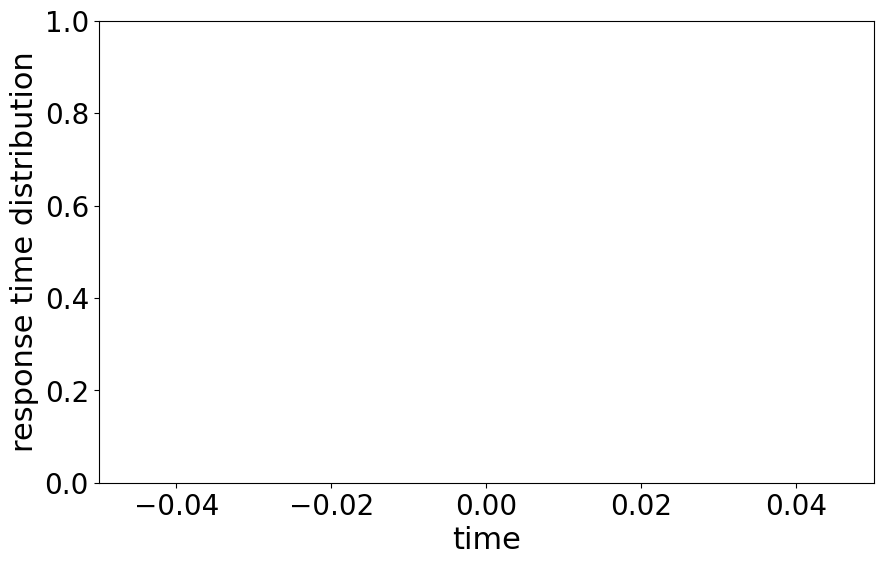

In [ ]:
    for param in defaults.keys():
        for value in single_combinations:
            combinations.append((param, value))
    
    
    # Execute Script
    for i, (param_name, param_value) in enumerate(combinations, 1):
        kwargs = defaults.copy()
        kwargs[param_name] = param_value

        plot_cdfs_from_folder(folder, kwargs['PAR'], kwargs['SEQ'], kwargs['ALT'])